
# A Practical Guide to PySpark with Python


In today's dynamic business landscape, achieving maximum productivity is essential for sustaining competitiveness and growth. Workflow optimization serves as a cornerstone for enhancing operational efficiency and resource utilization. By initiating a comprehensive **analysis** of existing processes, organizations can pinpoint bottlenecks and inefficiencies hindering productivity. This **planning** phase involves formulating a well-defined strategy to streamline operations, eliminate redundancies, and allocate resources effectively to accomplish tasks.

The **implementation** of advanced tools and technologies is paramount to support the optimized workflow structure. By leveraging automation and collaborative platforms, teams can enhance efficiency and accelerate task completion. Equally crucial is the **training** of personnel to ensure they are proficient in utilizing updated procedures and tools, fostering a culture of continuous improvement and adaptability.

Continuous **monitoring** of the workflow enables real-time tracking of progress and facilitates the early detection of deviations or potential issues. Flexibility is key, as organizations must remain poised to **adapt** and evolve their workflows in response to evolving market dynamics and operational demands. Regular **evaluation** of the optimized workflow ensures its ongoing effectiveness, allowing for iterative improvements and adjustments to drive sustained productivity gains.

**Workflow:**  
1. **Analysis:** Conduct an in-depth analysis of current processes to identify inefficiencies.
2. **Planning:** Develop a strategic plan to streamline workflow and optimize resource allocation.
3. **Implementation:** Integrate efficient tools and technologies to support the optimized workflow structure.
4. **Training:** Ensure thorough training for all team members to proficiently utilize updated procedures and tools.
5. **Monitoring:** Continuously monitor workflow progress to detect deviations and areas for improvement.
6. **Adaptation:** Be prepared to adapt and evolve the workflow to meet changing requirements and challenges.
7. **Evaluation:** Regularly evaluate the effectiveness of the optimized workflow and make necessary adjustments for further enhancement.


PySpark, the Python API for Apache Spark, opens up a world of possibilities for data processing and analysis. This practical guide provides step-by-step instructions to help you kickstart your journey with PySpark, starting from the basics.

Creating a SparkSession:
To begin harnessing the power of PySpark, the first step is to create a SparkSession. The SparkSession serves as the entry point to programming Spark using the Dataset and DataFrame API. Here's how you can create a SparkSession:

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Delhi Metro Analysis") \
    .getOrCreate()

In [2]:
df = spark.read.csv("C:/Users/anike/OneDrive/Desktop/Projects/Machine Learning\Pyspark/Delhi-Metro-Network.csv", header=True, inferSchema=True)
print(df.show())

+----------+--------------------+------------------------+------------+------------+--------------+-----------+-----------+
|Station ID|        Station Name|Distance from Start (km)|        Line|Opening Date|Station Layout|   Latitude|  Longitude|
+----------+--------------------+------------------------+------------+------------+--------------+-----------+-----------+
|         1|            Jhil Mil|                    10.3|    Red line|  2008-04-06|      Elevated|   28.67579|   77.31239|
|         2| Welcome [Conn: Red]|                    46.8|   Pink line|  2018-10-31|      Elevated|    28.6718|   77.27756|
|         3|         DLF Phase 3|                    10.0| Rapid Metro|  2013-11-14|      Elevated|    28.4936|    77.0935|
|         4|          Okhla NSIC|                    23.8|Magenta line|  2017-12-25|      Elevated| 28.5544828| 77.2648487|
|         5|          Dwarka Mor|                    10.2|   Blue line|  2005-12-30|      Elevated|   28.61932|   77.03326|
|       

 
### Data Exploration Functions in PySpark

**Introduction:**
Exploring data is a crucial step in any data analysis process. PySpark offers a range of functions to facilitate data exploration, aiding in understanding the structure and characteristics of datasets. Below, we highlight key functions for exploring data types and structure within PySpark.

**Understanding Data Types and Structure:**

1. **Schema Overview:**
   - Use the `printSchema()` function to obtain a summarized view of the DataFrame's schema, showcasing column names and their respective data types.

2. **Sample Data Display:**
   - Employ the `show()` function to display a sample of rows from the DataFrame, offering an initial glimpse into the dataset's contents.

3. **Descriptive Statistics:**
   - Utilize the `describe()` function to generate descriptive statistics for numerical columns, including count, mean, standard deviation, minimum, and maximum values.

4. **Counting Rows:**
   - Determine the total number of rows in the DataFrame with the `count()` function, providing insight into the dataset's size.

5. **Distinct Values Retrieval:**
   - Employ the `distinct()` function to retrieve unique values for specified columns, aiding in identifying distinct entries within the dataset.

**Conclusion:**
Exploring data types and structure is essential for gaining insights into the characteristics of datasets. By leveraging PySpark's data exploration functions, analysts can better understand the dataset's composition, identify patterns, and make informed decisions regarding subsequent data processing and analysis tasks. These functions serve as valuable tools for initiating the data analysis journey and laying the foundation for more in-depth exploration and analysis.

In [3]:
print(df.printSchema())

root
 |-- Station ID: integer (nullable = true)
 |-- Station Name: string (nullable = true)
 |-- Distance from Start (km): double (nullable = true)
 |-- Line: string (nullable = true)
 |-- Opening Date: date (nullable = true)
 |-- Station Layout: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)

None


In [4]:
print(df.select("Station Name", "Line").show())

+--------------------+------------+
|        Station Name|        Line|
+--------------------+------------+
|            Jhil Mil|    Red line|
| Welcome [Conn: Red]|   Pink line|
|         DLF Phase 3| Rapid Metro|
|          Okhla NSIC|Magenta line|
|          Dwarka Mor|   Blue line|
|Dilli Haat INA [C...|   Pink line|
|    Noida Sector 143|   Aqua line|
|           Moolchand| Voilet line|
|        Chawri Bazar| Yellow line|
|           Maya Puri|   Pink line|
|Central Secretari...| Yellow line|
|    Noida Sector 146|   Aqua line|
|        Tikri Border|  Green line|
|            Jangpura| Voilet line|
|  Major Mohit Sharma|    Red line|
|         Majlis Park|   Pink line|
|  Bhikaji Cama Place|   Pink line|
|Mundka Industrial...|  Green line|
|    Belvedere Towers| Rapid Metro|
|        Adarsh Nagar| Yellow line|
+--------------------+------------+
only showing top 20 rows

None


In [6]:
print(df.filter(df["Line"] == "Blue line").show())

+----------+--------------------+------------------------+---------+------------+--------------+----------+----------+
|Station ID|        Station Name|Distance from Start (km)|     Line|Opening Date|Station Layout|  Latitude| Longitude|
+----------+--------------------+------------------------+---------+------------+--------------+----------+----------+
|         5|          Dwarka Mor|                    10.2|Blue line|  2005-12-30|      Elevated|  28.61932|  77.03326|
|        21|   Noida City Center|                    47.2|Blue line|  2009-12-11|      Elevated|  28.57466|  77.35608|
|        23|     Dwarka Sector 9|                     2.7|Blue line|  2006-01-04|      Elevated|  28.57487|  77.06454|
|        26|     R K Ashram Marg|                    28.9|Blue line|  2005-12-30|      Elevated|  28.63923|   77.2084|
|        27|    Uttam Nagar West|                    12.4|Blue line|  2005-12-30|      Elevated|  28.62481|   77.0653|
|        30|         Golf Course|               

### Data Manipulation Functions in PySpark
 
Data manipulation is a fundamental aspect of data processing tasks, enabling analysts to transform and enhance datasets to suit their analytical needs. PySpark provides a rich set of functions for performing various data manipulation operations efficiently. This section outlines essential functions for manipulating data within PySpark.

**Adding a New Column:**  
One common data manipulation task is adding a new column to a DataFrame. PySpark offers intuitive methods for accomplishing this, such as:

1. **withColumn():**
   - Use the `withColumn()` function to add a new column to the DataFrame, incorporating transformations or calculations as needed. For instance, to convert distance from kilometers to miles:

```python
# Add a new column 'distance_miles' by converting 'distance_km' to miles
from pyspark.sql.functions import col

dataframe = dataframe.withColumn("distance_miles", col("distance_km") * 0.621371)
```

By applying the `withColumn()` function, you can seamlessly integrate new columns into your DataFrame, facilitating further analysis and insights.


Data manipulation tasks are integral to the data analysis process, enabling analysts to prepare and transform datasets for analysis effectively. PySpark's versatile functions for data manipulation, such as `withColumn()`, empower analysts to manipulate data with ease and efficiency. By leveraging these functions, analysts can tailor datasets to meet specific analytical requirements, paving the way for insightful data analysis and decision-making.

In [7]:
from pyspark.sql.functions import col
df = df.withColumn("Distance from Start (miles)", col("Distance from Start (km)") * 0.621371)

In [8]:
df = df.withColumnRenamed("Distance from Start (km)", "DistanceKM")

In [9]:
from pyspark.sql import functions as F
df.groupBy("Line").agg(
    F.avg("DistanceKM").alias("Average Distance"),
    F.max("DistanceKM").alias("Max Distance")
).show()

+-----------------+------------------+------------+
|             Line|  Average Distance|Max Distance|
+-----------------+------------------+------------+
|      Rapid Metro|  5.70909090909091|        10.0|
|        Blue line|26.144897959183673|        52.7|
|Green line branch|1.0666666666666667|         2.1|
|       Green line|11.380952380952383|        24.8|
| Blue line branch|               4.0|         8.1|
|      Voilet line|20.617647058823525|        43.5|
|      Yellow line|21.462162162162162|        45.7|
|        Gray line|               1.8|         3.9|
|         Red line| 16.55862068965517|        32.7|
|        Pink line|28.773684210526323|        52.6|
|     Magenta line|            17.656|        33.1|
|      Orange line|10.566666666666665|        20.8|
|        Aqua line|13.352380952380955|        27.1|
+-----------------+------------------+------------+



### Efficient Data Analysis with SQL in PySpark

PySpark seamlessly integrates SQL capabilities with its DataFrame API, enhancing data querying and manipulation.

**Executing SQL Queries on DataFrames:**  
1. **Registering DataFrames:**  
   - Use `createOrReplaceTempView()` to designate DataFrames as temporary views.

2. **Running Queries:**  
   - Execute SQL statements via `spark.sql()` for operations like filtering and aggregation.

3. **Accessing Results:**  
   - Retrieve query outcomes as new DataFrames for further analysis.

By blending SQL with PySpark, analysts efficiently harness SQL's power within a distributed computing framework, enabling streamlined data analysis and informed decision-making.

In [10]:
df.createOrReplaceTempView("metro")
spark.sql("SELECT Line, COUNT(*) as StationCount FROM metro GROUP BY Line").show()


+-----------------+------------+
|             Line|StationCount|
+-----------------+------------+
|      Rapid Metro|          11|
|        Blue line|          49|
|Green line branch|           3|
|       Green line|          21|
| Blue line branch|           8|
|      Voilet line|          34|
|      Yellow line|          37|
|        Gray line|           3|
|         Red line|          29|
|        Pink line|          38|
|     Magenta line|          25|
|      Orange line|           6|
|        Aqua line|          21|
+-----------------+------------+



### Enhancing Data Exploration with Visualization in PySpark
Visualization plays a pivotal role in data exploration and analysis, offering graphical insights into patterns, trends, and anomalies within the data. While PySpark doesn't natively support plotting, it excels in data preprocessing and aggregation, preparing the data for visualization using libraries like Matplotlib, Seaborn, or Plotly.

**Preparing Data for Visualization:**  
Before plotting, utilize PySpark to preprocess and aggregate data. For instance, to visualize the number of stations per line in the Delhi Metro dataset:


**Plotting with Pandas and Visualization Libraries:**  
Once data is aggregated and prepared in PySpark, convert it to a Pandas DataFrame for visualization. Use libraries like Matplotlib, Seaborn, or Plotly to create insightful plots and graphs.
 
While PySpark lacks native plotting capabilities, its strength lies in data preprocessing and aggregation. By leveraging PySpark for data preparation and then converting to Pandas for visualization, analysts can create meaningful plots to uncover insights and drive data-driven decisions effectively.

In [11]:
stations_per_line = df.groupBy("Line").count()

**Converting PySpark DataFrame to Pandas DataFrame:**

After aggregating or filtering the data in PySpark to meet specific requirements, the next step is often to convert the PySpark DataFrame to a Pandas DataFrame for further analysis or visualization. This conversion process brings the distributed data onto a single node, facilitating seamless operations on smaller datasets. 

Converting a PySpark DataFrame to a Pandas DataFrame involves transferring the data from a distributed computing environment to a local environment, typically residing on a single machine. This conversion is particularly beneficial for working with aggregated data or subsets, as it helps mitigate potential memory issues that may arise from attempting to process large datasets entirely within PySpark.

By leveraging the strengths of both PySpark and Pandas, analysts can perform complex data transformations and aggregations using PySpark's distributed computing capabilities, and then seamlessly transition to Pandas for more granular analysis or visualization tasks. 

However, it's essential to exercise caution when converting large datasets, as bringing all data onto a single node may overwhelm the available memory resources. Therefore, it's advisable to perform the conversion on aggregated data or subsets to ensure efficient memory management and prevent performance degradation.

The conversion of PySpark DataFrame to Pandas DataFrame marks a strategic transition point in the data analysis pipeline, enabling analysts to leverage the scalability of PySpark for data processing and then harness the flexibility and rich functionality of Pandas for in-depth analysis and visualization.

In [12]:
stations_per_line_pd = stations_per_line.toPandas()

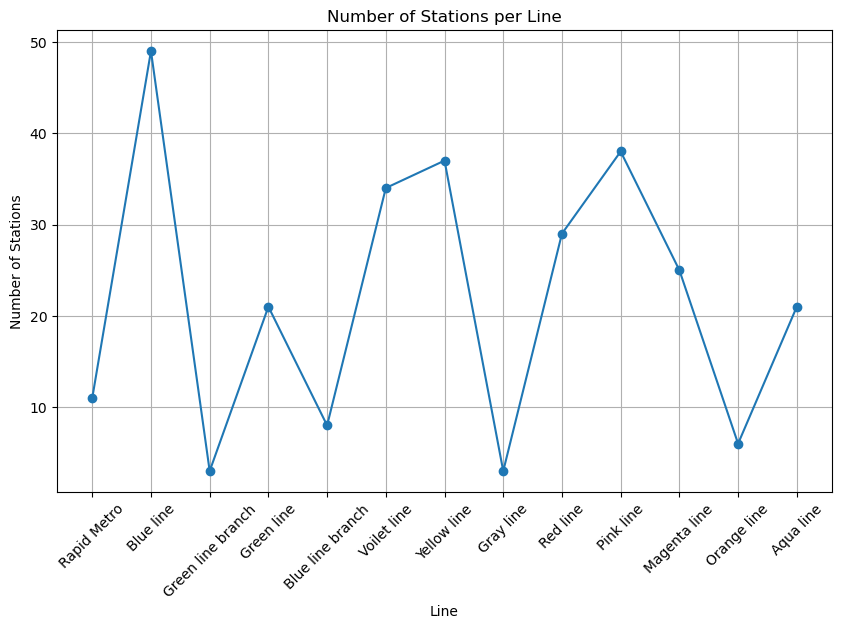

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(stations_per_line_pd['Line'], stations_per_line_pd['count'], marker='o')
plt.title('Number of Stations per Line')
plt.xlabel('Line')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


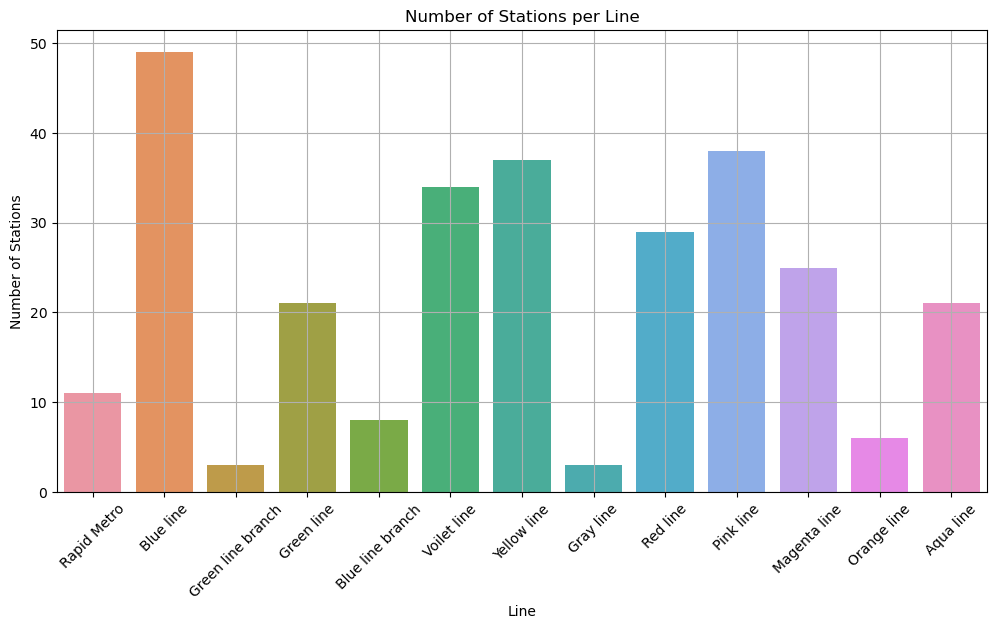

In [14]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Line', y='count', data=stations_per_line_pd)
plt.title('Number of Stations per Line')
plt.xlabel('Line')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Summary

The article provides a comprehensive practical guide to using PySpark for data analysis, starting with the basics of setting up a SparkSession and loading data from various sources. It covers essential data exploration functions such as schema printing, column selection, and filtering. Additionally, it demonstrates data manipulation techniques like adding and renaming columns, as well as aggregating data.

Furthermore, the article showcases how to run SQL queries on PySpark DataFrames and emphasizes the importance of visualization for data exploration. While PySpark itself lacks built-in plotting capabilities, the article explains how to convert PySpark DataFrames to Pandas DataFrames for visualization using libraries like Matplotlib.

Overall, the article serves as a valuable resource for data professionals seeking to leverage PySpark's capabilities for processing large datasets efficiently. It provides practical examples and insights into performing various data analysis tasks using PySpark.